# Animal Classification - The Oxford-IIIT Pet Dataset


In this project, we will complete tasks for an end-to-end image classification application. We will train and test the data using the Oxford-III Pet Dataset:

- https://www.robots.ox.ac.uk/~vgg/data/pets/

This is a small dataset with 37 breeds of cats and dogs. Downloading the image files and annotations from the above link, and unzipping it on our work directory. This will create the following two directories:

- `images` - Images saved as jpg files, one file per image.
- `annotations` - Image annotations for image segmentation, object detection, and image classification. 

## Task 1  - Data preparation and exploration

### 1.1 

The `annotations` directory has the files `trainval.txt` and `test.txt`. We make Python code that counts the number of samples for each of the 37 categories in each of these files. In a MarkDown text cell, we answer these questions, providing a justification:

1. Are the data balanced? Comment on whether there are any categories with an unusually large or small number of samples, relative to the other categories.
2. Are there any significant differences in the distribution of categories in `trainval.txt` with respect to `test.txt`?

                 Type/Category  Train Count  Test Count
0                   Abyssinian          100          98
1                       Bengal          100         100
2                       Birman          100         100
3                       Bombay           96          88
4            British_Shorthair          100         100
5                 Egyptian_Mau           93          97
6                   Maine_Coon          100         100
7                      Persian          100         100
8                      Ragdoll          100         100
9                 Russian_Blue          100         100
10                     Siamese           99         100
11                      Sphynx          100         100
12            american_bulldog          100         100
13   american_pit_bull_terrier          100         100
14                basset_hound          100         100
15                      beagle          100         100
16                       boxer          100     

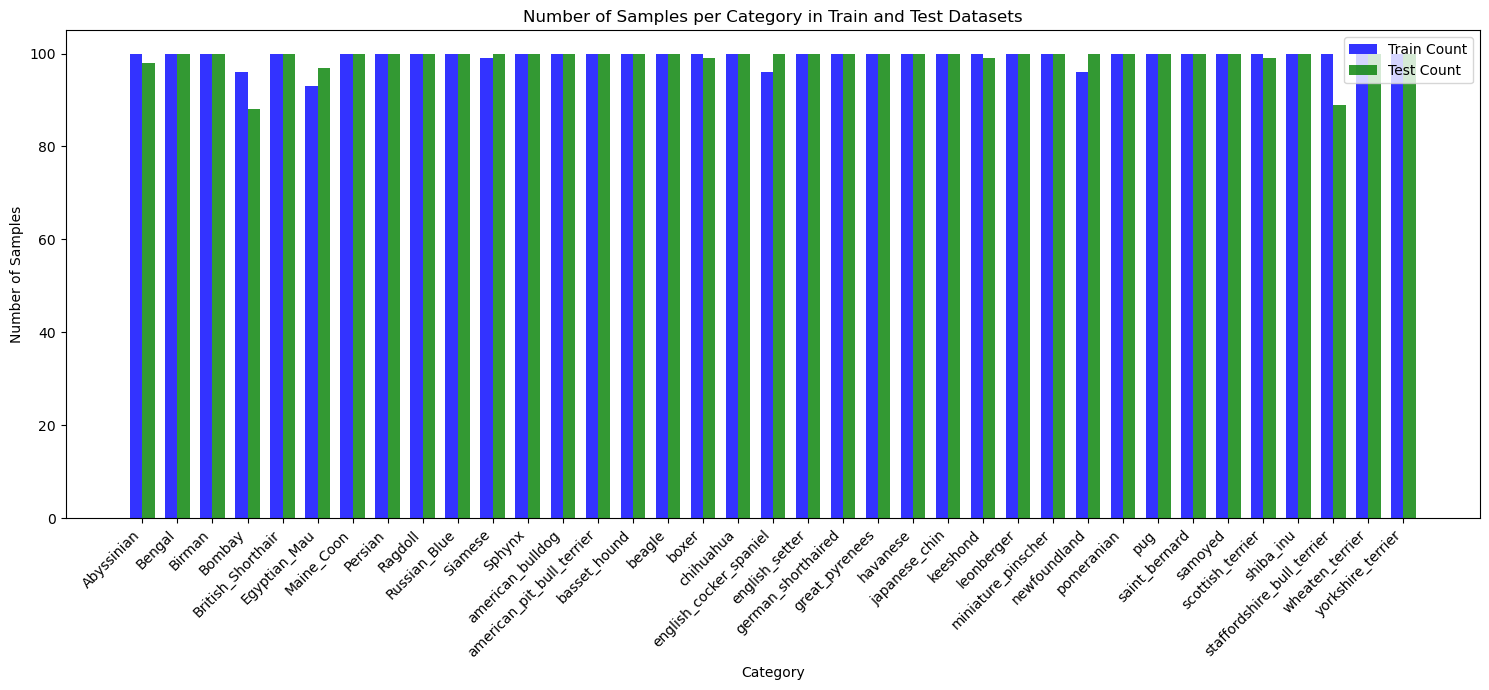

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

def count(data):
    labels = [line.rsplit("_", 1)[0] for line in data]
    label_counts = pd.Series(labels).value_counts().sort_index()
    return label_counts

# Read train and test data 
with open("annotations/trainval.txt") as f:
    train_data = f.readlines()

with open("annotations/test.txt") as f:
    test_data = f.readlines()

training_count = count(train_data)
test_count = count(test_data)

total_counts = pd.DataFrame({'Train Count': training_count, 'Test Count': test_count}).reset_index()
total_counts.columns = ['Type/Category', 'Train Count', 'Test Count']

print(total_counts)

# Visualization of both, train and test data together. 
fig, ax = plt.subplots(figsize=(15, 7))
bar_width = 0.35
opacity = 0.8

rects1 = ax.bar(total_counts.index - bar_width / 2, total_counts['Train Count'], bar_width,
                alpha=opacity, color='b', label='Train Count')
rects2 = ax.bar(total_counts.index + bar_width / 2, total_counts['Test Count'], bar_width,
                alpha=opacity, color='g', label='Test Count')

ax.set_xlabel("Category")
ax.set_ylabel("Number of Samples")
ax.set_title("Number of Samples per Category in Train and Test Datasets")
ax.set_xticks(total_counts.index)
ax.set_xticklabels(total_counts['Type/Category'], rotation=45, ha='right')
ax.legend()

fig.tight_layout()
plt.show()




##### 1) Upon examining the generated graph and the corresponding data rows, it is evident that the majority of the dataset exhibits a balanced distribution, with only minor discrepancies observed in a few instances. For example, the Abyssinian category has a train count of 100 and a test count of 98, while the Bombay category's train count stands at 96 with a test count of 88. Furthermore, the Staffordshire category has a train count of 100 and a test count of 89. Overall, these slight variations do not significantly impact the balance of the data.

##### 2) The overall distribution of categories between the train and test datasets is consistent, as demonstrated by the output generated. While no substantial differences are observed in the distribution, it is worth noting that certain categories, such as Abyssinian, Bombay, Egyptian Mau, and Staffordshire Bull Terrier, exhibit an uneven count between the train and test sets. Despite these minor imbalances, the overall distribution remains largely uniform across both datasets.

### 1.2 

Display 10 random images from the "trainval" data and the "test" data.

In [2]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

# Read file names from trainval.txt and test.txt
with open("annotations/trainval.txt") as f:
    trainval_files = f.readlines()

with open("annotations/test.txt") as f:
    test_files = f.readlines()

# Remove newlines, extract file name, and add .jpg extension to file names
trainval_files = [file.split()[0] + ".jpg" for file in trainval_files]
test_files = [file.split()[0] + ".jpg" for file in test_files]

# Randomly select 10 file names from each list
random_trainval_files = random.sample(trainval_files, 10)
random_test_files = random.sample(test_files, 10)


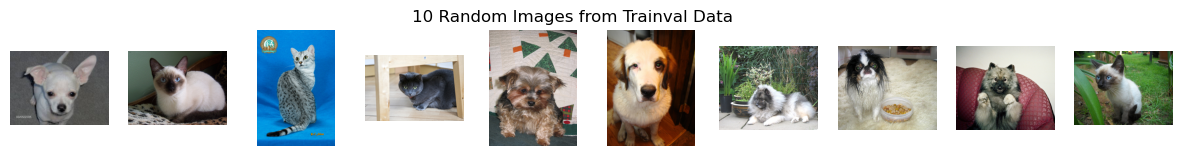

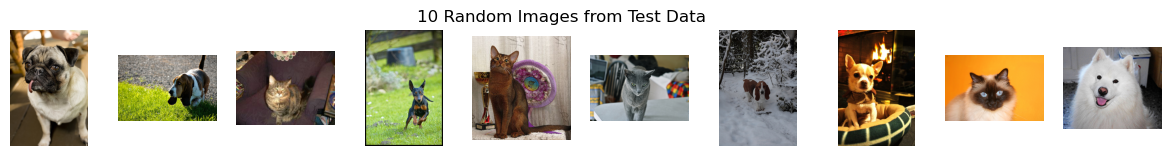

In [3]:
# Function to load and display images
def display_images(image_files, title):
    fig, axes = plt.subplots(1, 10, figsize=(15, 2))
    fig.suptitle(title)

    for ax, img_file in zip(axes, image_files):
        img_path = os.path.join("images", img_file)
        img = Image.open(img_path)
        ax.imshow(img)
        ax.set_xlabel(img_file, rotation=45, ha='right', fontsize=10)
        ax.set_axis_off()
        
    # Add space for image labels
    fig.subplots_adjust(bottom=0.3)

# Display 10 random images from trainval and test data
display_images(random_trainval_files, "10 Random Images from Trainval Data")
display_images(random_test_files, "10 Random Images from Test Data")
plt.show()

### 1.3 

Split the `annotations/test.txt` list of files into `validation.txt` and `newtest.txt` so that half of the items in each category falls into `validation.txt`, and the other half into `newtest.txt`. It is up to us how to do the splitting, but  we have to make sure that the distribution of categories in each is similar. We then show the distribution of category counts on the resulting `validation.txt` and `newtest.txt` to demonstrate that the distribution of category counts is half/half.

To facilitate the next tasks, we make sure that the files `validation.txt` and `newtest.txt` contain the full path of the image files relative to the folder where this notebook is located, for example, the first lines of `validation.txt` might be like this:

```
images/Abyssinian_99.jpg 1 1 1
images/Abyssinian_25.jpg 1 1 1
images/Abyssinian_78.jpg 1 1 1
images/Abyssinian_86.jpg 1 1 1
```

Also to facilitate the next tasks , we write Python code that rewrites the contents of `annotations/trainval.txt` into a new file `training.txt` that also contains the full relative path of the images.

The following are sampls files for our understanding. Our files should look a little similar to these.
- [`training.txt`](training.txt)
- [`validation.txt`](validation.txt)
- [`newtest.txt`](newtest.txt)

In [4]:
import os
from collections import defaultdict

def read_file(filename):
    with open(filename, "r") as f:
        content = f.readlines()
    return [line.strip() for line in content]

def write_file(filename, lines):
    with open(filename, "w") as f:
        f.writelines('\n'.join(lines))

def print_lines(filename):
    content = read_file(filename)
    for line in content[:5]:
        print(line)
    print()

def count_categories(lines, has_prefix=True):
    category_counts = defaultdict(int)
    for line in lines:
        parts = line.split('/')
        if has_prefix:
            category = parts[1].rsplit('_', 1)[0]
        else:
            category = parts[0].rsplit('_', 1)[0]
        category_counts[category] += 1
    return category_counts



In [5]:
# Read the test.txt and trainval.txt files
test_content = read_file('annotations/test.txt')
trainval_content = read_file('annotations/trainval.txt')

category_counts = count_categories(test_content, has_prefix=False)


# Split the contents into validation.txt and newtest.txt
validation_lines = []
newtest_lines = []

for category in category_counts:
    category_lines = [line for line in test_content if category in line]
    half = len(category_lines) // 2
    validation_lines.extend(category_lines[:half])
    newtest_lines.extend(category_lines[half:])

# Add image path
validation_lines = [f'images/{line}' for line in validation_lines]
newtest_lines = [f'images/{line}' for line in newtest_lines]

# Write the contents to validation.txt and newtest.txt
write_file('validation.txt', validation_lines)
write_file('newtest.txt', newtest_lines)

# Read the trainval.txt file and add the image path
trainval_lines = [f'images/{line}' for line in trainval_content]

# Write the contents to training.txt
write_file('training.txt', trainval_lines)

# Print first few lines of validation.txt, newtest.txt, and training.txt
print_lines('validation.txt')
print_lines('newtest.txt')
print_lines('training.txt')

images/Abyssinian_201 1 1 1
images/Abyssinian_202 1 1 1
images/Abyssinian_204 1 1 1
images/Abyssinian_205 1 1 1
images/Abyssinian_206 1 1 1

images/Abyssinian_52 1 1 1
images/Abyssinian_54 1 1 1
images/Abyssinian_55 1 1 1
images/Abyssinian_56 1 1 1
images/Abyssinian_57 1 1 1

images/Abyssinian_100 1 1 1
images/Abyssinian_101 1 1 1
images/Abyssinian_102 1 1 1
images/Abyssinian_103 1 1 1
images/Abyssinian_104 1 1 1



In [6]:

# Count categories in newtest.txt and validation.txt
validation_content = read_file('validation.txt')
newtest_content = read_file('newtest.txt')

validation_category_counts = count_categories(validation_content)
newtest_category_counts = count_categories(newtest_content)

# Print category counts for validation.txt and newtest.txt
print("Category counts in validation.txt:", validation_category_counts)
print("Category counts in newtest.txt:", newtest_category_counts)

Category counts in validation.txt: defaultdict(<class 'int'>, {'Abyssinian': 49, 'american_bulldog': 50, 'american_pit_bull_terrier': 50, 'basset_hound': 50, 'beagle': 50, 'Bengal': 50, 'Birman': 50, 'Bombay': 44, 'boxer': 49, 'British_Shorthair': 50, 'chihuahua': 50, 'Egyptian_Mau': 48, 'english_cocker_spaniel': 50, 'english_setter': 50, 'german_shorthaired': 50, 'great_pyrenees': 50, 'havanese': 50, 'japanese_chin': 50, 'keeshond': 49, 'leonberger': 50, 'Maine_Coon': 50, 'miniature_pinscher': 50, 'newfoundland': 50, 'Persian': 50, 'pomeranian': 50, 'pug': 50, 'Ragdoll': 50, 'Russian_Blue': 50, 'saint_bernard': 50, 'samoyed': 50, 'scottish_terrier': 49, 'shiba_inu': 50, 'Siamese': 50, 'Sphynx': 50, 'staffordshire_bull_terrier': 44, 'wheaten_terrier': 50, 'yorkshire_terrier': 50})
Category counts in newtest.txt: defaultdict(<class 'int'>, {'Abyssinian': 49, 'american_bulldog': 50, 'american_pit_bull_terrier': 50, 'basset_hound': 50, 'beagle': 50, 'Bengal': 50, 'Birman': 50, 'Bombay': 4

### 1.4 

Using TensorFlow's `TextLineDataset` to generate datasets for training, validation, and test. The datasets need to produce images that are re-sized to dimensions 200x200, and the values of the pixels are normalised to the range [0, 1]. For this task and following tasks we use the following files:

- [`training.txt`](training.txt)
- [`validation.txt`](validation.txt)
- [`newtest.txt`](newtest.txt)

In [7]:
import tensorflow as tf
import numpy as np

def parse_line(line):
    parts = tf.strings.split(line, ' ')
    image_path = parts[0]
    label = tf.strings.to_number(parts[1], tf.int32)
    return image_path, label

def load_and_preprocess_image(path, label):
    img = tf.io.read_file(path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, [200, 200])
    img = img / 255.0  # normalize pixel values to the range [0, 1]
    return img, label

def create_dataset(file_path, batch_size=32, shuffle_buffer_size=None, repeat=False):
    dataset = tf.data.TextLineDataset(file_path)
    dataset = dataset.map(parse_line, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    dataset = dataset.map(load_and_preprocess_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)

    if shuffle_buffer_size:
        dataset = dataset.shuffle(shuffle_buffer_size)

    dataset = dataset.batch(batch_size)

    if repeat:
        dataset = dataset.repeat()

    dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)
    return dataset

training_file = "trainingP.txt"
validation_file = "validationP.txt"
newtest_file = "newtestP.txt"

train_ds = create_dataset(training_file, batch_size=32, shuffle_buffer_size=1000, repeat=True)
val_ds = create_dataset(validation_file, batch_size=32)
test_ds = create_dataset(newtest_file, batch_size=32)


In [8]:
print(train_ds)
print(val_ds)
print(test_ds)


<PrefetchDataset element_spec=(TensorSpec(shape=(None, 200, 200, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<PrefetchDataset element_spec=(TensorSpec(shape=(None, 200, 200, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<PrefetchDataset element_spec=(TensorSpec(shape=(None, 200, 200, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


## Task 2  - A simple classifier

We now implement a simple classifier that uses these layers. We now need to decide a reasonable ordering of the layers, and reasonable values of the various parameters in each layer.

- Dense layers.
- Dropout.
- Final classification.

The task will be composed of the following subtasks:

### 2.1 

Creating a simple model that just contains the following two layers:

- A `Flatten` layer.
- The output layer with the correct size and activation function.

Then, we need to train the model with the training data. Use the validation data to determine when to stop training. Determine whether the system is overfitting and at what point in the training stage (if it is overfitting).

Finally, test the trained model on the test data and report the accuracy results.


Also, we expect that we will probably obtain a very low accuracy. Later we will try to improve it (hypothesis, to be tested):

In [24]:
import tensorflow as tf
from tensorflow.keras import models, layers

def plot_training_metrics(metrics, history):
    num_metrics = len(metrics)
    fig, axes = plt.subplots(1, num_metrics, figsize=(5 * num_metrics, 5))
    
    for idx, metric in enumerate(metrics):
        axes[idx].plot(history.history[metric], ls='dashed')
        axes[idx].set_xlabel("Epochs")
        axes[idx].set_ylabel(metric)
        axes[idx].plot(history.history['val_' + metric])
        axes[idx].legend([metric, 'val_' + metric])

def build_model(input_shape, num_classes):
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=input_shape))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model

input_shape = (200, 200, 3)
num_classes = 38  #encountered and error when placing 37 as the category value. Chat GPT prompted to increase by one to solve "off-by-one error"

model = build_model(input_shape, num_classes)
model.summary()



Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 120000)            0         
                                                                 
 dense_1 (Dense)             (None, 38)                4560038   
                                                                 
Total params: 4,560,038
Trainable params: 4,560,038
Non-trainable params: 0
_________________________________________________________________


In [25]:
#calculating steps per epoch
#this function was obtained from chatGPT, counting length through conventional means was giving errors. 
def count_lines(file_path):
    count = 0
    with open(file_path) as f:
        for _ in f:
            count += 1
    return count

train_size = count_lines(training_file)


batch_size = 32
steps_per_epoch = train_size // batch_size
print(steps_per_epoch)


115


Epoch 1/20
115/115 [==============================] - 4s 30ms/step - loss: 58.1433 - accuracy: 0.1008 - val_loss: 28.9109 - val_accuracy: 0.0524
Epoch 2/20
115/115 [==============================] - 3s 30ms/step - loss: 24.7188 - accuracy: 0.1622 - val_loss: 25.8907 - val_accuracy: 0.0628
Epoch 3/20
115/115 [==============================] - 4s 36ms/step - loss: 24.1171 - accuracy: 0.1799 - val_loss: 30.7681 - val_accuracy: 0.0688
Epoch 4/20
115/115 [==============================] - 4s 39ms/step - loss: 24.6394 - accuracy: 0.1932 - val_loss: 35.8986 - val_accuracy: 0.0650
Epoch 5/20
115/115 [==============================] - 5s 41ms/step - loss: 22.9940 - accuracy: 0.2348 - val_loss: 25.9882 - val_accuracy: 0.0617
Epoch 6/20
115/115 [==============================] - 4s 31ms/step - loss: 22.1236 - accuracy: 0.2353 - val_loss: 41.0321 - val_accuracy: 0.0682
Epoch 7/20
115/115 [==============================] - 4s 31ms/step - loss: 22.8073 - accuracy: 0.2592 - val_loss: 27.3095 - val_ac

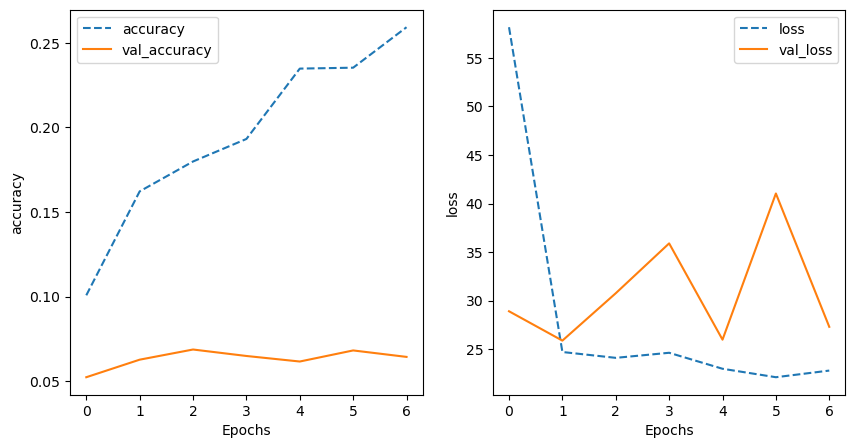

In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

history = model.fit(train_ds, validation_data=val_ds, epochs=20, steps_per_epoch=steps_per_epoch, callbacks=[tf.keras.callbacks.EarlyStopping(patience=5)])


plot_training_metrics(['accuracy', 'loss'], history)


In [18]:
test_loss, test_acc = model.evaluate(test_ds, verbose=2)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

58/58 - 1s - loss: 27.0506 - accuracy: 0.0719 - 875ms/epoch - 15ms/step

Test Accuracy: 0.071856290102005

Test Loss: 27.05062484741211


##### The low validation accuracy and the significant difference between training accuracy and validation accuracy indicate that our model might be overfitting to the training data. Here, even changing the patience or epochs might not make a substantial difference. We might need to change the architecture to obtain better results, but it is not asked for in the question. 

### 2.3 

Now, lets try a more complex architecture that has an additional hidden layer with dropout. For this more complex architecture, we try various values of parameters including the following: 

- Hidden layer size
- Dropout rate
- Learning rate

For this, we use `keras-tuner` and run it with a reasonable choice of possible parameters and report on the optimal parameters and final evaluation results.

In a separate Markdown text cell, we justify our choice of potential parameters.

Then we use the best model obtained here to report the evaluation results on the test data.

In [33]:
#building our model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras_tuner import RandomSearch

def build_model(hp, num_classes=38):
    model = keras.Sequential()
    model.add(layers.Flatten(input_shape=(200, 200, 3)))
    
    num_hidden = hp.Int('num_hidden', min_value=64, max_value=512, step=32)
    model.add(layers.Dense(num_hidden, activation='relu'))
    
    dropout_rate = hp.Float('dropout_rate', min_value=0.0, max_value=0.5, step=0.1)
    model.add(layers.Dropout(dropout_rate))
    
    model.add(layers.Dense(38, activation='softmax'))
    
    learning_rate = hp.Float('learning_rate', min_value=1e-5, max_value=1e-3, sampling='log')
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
                  loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                  metrics=['accuracy'])
    return model


In [34]:
#------------------------------------------------ searching for the optimal OR best hyperparameters-------------------------------------------------------------
# Please note, this code has been tuned to run faster with the given limited resources as this block was taking more than an hour to run and any kernal crashes meant
# rerunning the code from the start. Max trials and epochs have hence been reduced accordingly.
# the output is a little different from the intial output as it has already been run once. 

# defining our search algorithm
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=2,
    directory='hyperparameter_tuning',
    project_name='tuning_complex_model')

tuner.search_space_summary()

#steps per epoch defined in task 2.1 , however validation_steps need to be calculated. 

#function has been directly taken from chat gpt. My own method of counting validation steps was not working
def get_dataset_size(ds):
    count = 0
    for _ in ds:
        count += 1
    return count

val_size = get_dataset_size(val_ds)
validation_steps = val_size // batch_size



tuner.search(train_ds,
             epochs=5,
             steps_per_epoch=steps_per_epoch,
             validation_data=val_ds,
             validation_steps=validation_steps,
             callbacks=[tf.keras.callbacks.EarlyStopping(patience=2)])


best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]


INFO:tensorflow:Reloading Tuner from hyperparameter_tuning\tuning_complex_model\tuner0.json
Search space summary
Default search space size: 3
num_hidden (Int)
{'default': None, 'conditions': [], 'min_value': 64, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
dropout_rate (Float)
{'default': 0.0, 'conditions': [], 'min_value': 0.0, 'max_value': 0.5, 'step': 0.1, 'sampling': 'linear'}
learning_rate (Float)
{'default': 1e-05, 'conditions': [], 'min_value': 1e-05, 'max_value': 0.001, 'step': None, 'sampling': 'log'}
INFO:tensorflow:Oracle triggered exit


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 120000)            0         
                                                                 
 dense_2 (Dense)             (None, 256)               30720256  
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 38)                9766      
                                                                 
Total params: 30,730,022
Trainable params: 30,730,022
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
115/115 [==============================] - 12s 95ms/step - loss: 10.3374 - accuracy: 0.0304 - val_loss: 3.6365 - val_accuracy: 0.0278
Epoch 2/30
115/115 [=========

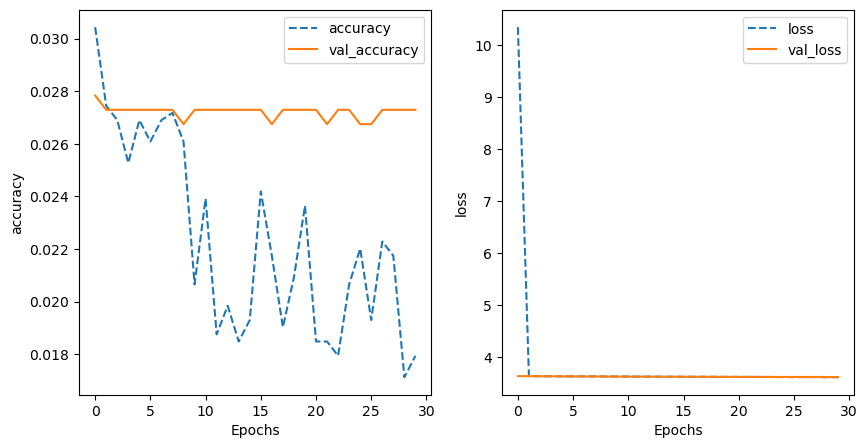

In [35]:
best_model = tuner.hypermodel.build(best_hyperparameters)
best_model.summary()

history = best_model.fit(train_ds, validation_data=val_ds, epochs=30, steps_per_epoch=steps_per_epoch,
                         callbacks=[tf.keras.callbacks.EarlyStopping(patience=5)])

plot_training_metrics(['accuracy', 'loss'], history)



In [36]:
test_loss, test_acc = best_model.evaluate(test_ds, verbose=2)
print('\nTest accuracy:', test_acc)
print('\nTest loss', test_loss)


58/58 - 1s - loss: 3.6182 - accuracy: 0.0272 - 1s/epoch - 23ms/step

Test accuracy: 0.02721829153597355

Test loss 3.61824893951416



##### The chosen hyperparameters are reasonable because they cover a wide range of possible values while still providing precision (granularity) in the search. A step size of 32 is used for the hidden layer size to balance granularity with search time. A range between 0.0 and 0.5 with a step of 0.1 is chosen for the dropout rate to cover a wide range of possible values while avoiding excessive dropout. A logarithmic scale is used for the learning rate to allow for a wide range of possible values while still providing granularity in the lower range. Early stopping is used to prevent overfitting, and the best model is evaluated on the test set to provide a final evaluation of its performance.
##### Different search algorithms like hyperband or Bayesian optimization might have been checked as well and accuracy and test loss results compared to check what works better but due to its simplicity and the large runtime in each execution, RandomSearch was finalised. 

### 2.4 

Now we conduct error analysis with the best model that we have obtained from the previous experiments. In particular, answer the following questions we have created:
1. What animal breed is easier to detect?
2. What animal breed is more difficult to detect?
3. Display examples of classification errors.
4. Display examples of correct classifications.

In [37]:
# Read the list of breed names
with open("annotations/list.txt", "r") as f:
    lines = f.readlines()

breed_names = []
for line in lines:
    if line.startswith("#"):
        continue
    breed_name = line.split()[0].rsplit("_", 1)[0]
    if breed_name not in breed_names:
        breed_names.append(breed_name)

# Create a dictionary that maps breed indices to breed names
CLASS_NAMES = {i: breed_names[i] for i in range(len(breed_names))}


#defining our label extraction function 
def label_extraction(model, dataset):
    error = []
    correct = []
    y_test = []
    y_pred = []
    for img, label in dataset:
        y_test.extend(label.numpy())
        predictions = best_model.predict(img)
        predicted_label = tf.argmax(predictions, axis=1).numpy()
        y_pred.extend(predicted_label)
        for i in range(len(label)):
            true_label_name = CLASS_NAMES[label[i].numpy() - 1]
            pred_label_name = CLASS_NAMES[predicted_label[i] - 1]
            if label[i].numpy() == predicted_label[i]:
                correct.append((img[i], true_label_name, pred_label_name))
            else:
                error.append((img[i], true_label_name, pred_label_name))

    return y_test, y_pred, error, correct


In [39]:
from sklearn.metrics import classification_report

# Get the test labels, predicted labels, errors and correct classifications
test_label, pred_label, errors, corrects = label_extraction(best_model, val_ds)

# Create target names for classification report using the breed names
target_names = [CLASS_NAMES[i] for i in sorted(CLASS_NAMES.keys())]

# Print classification report
print(classification_report(test_label, pred_label, target_names=target_names))

1/1 [==============================] - 0s 24ms/step
                            precision    recall  f1-score   support

                Abyssinian       0.00      0.00      0.00        49
          american_bulldog       0.00      0.00      0.00        50
 american_pit_bull_terrier       0.00      0.00      0.00        50
              basset_hound       0.00      0.00      0.00        50
                    beagle       0.00      0.00      0.00        50
                    Bengal       0.00      0.00      0.00        50
                    Birman       0.00      0.00      0.00        50
                    Bombay       0.00      0.00      0.00        44
                     boxer       0.00      0.00      0.00        49
         British_Shorthair       0.00      0.00      0.00        50
                 chihuahua       0.00      0.00      0.00        50
              Egyptian_Mau       0.00      0.00      0.00        48
    english_cocker_spaniel       0.00      0.00      0.00      

c:\Users\Daniyal\anaconda3\envs\AI\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Daniyal\anaconda3\envs\AI\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Daniyal\anaconda3\envs\AI\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


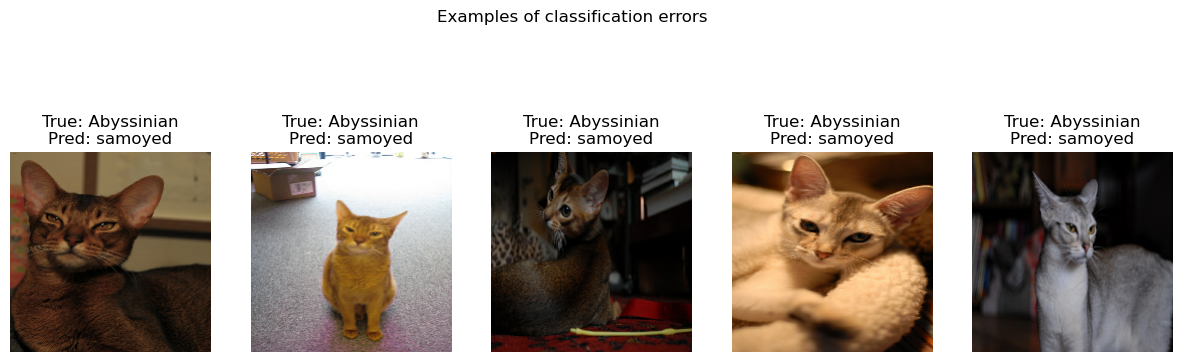

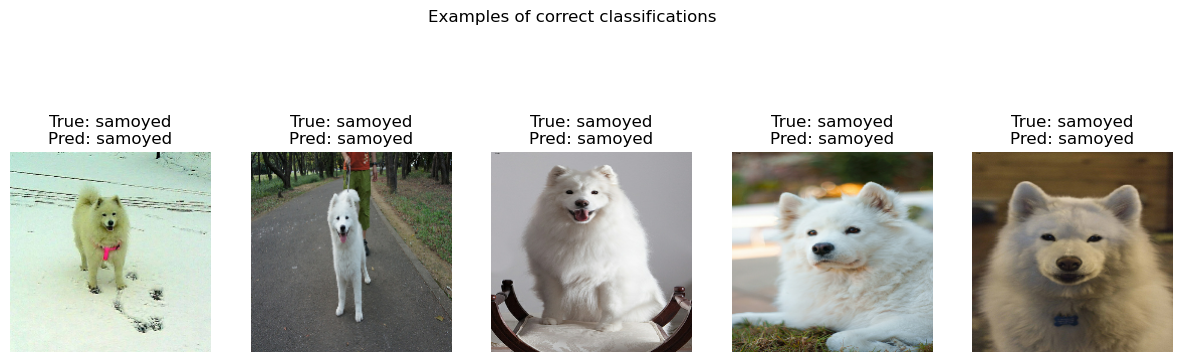

In [40]:
# plotting images
def plot_images(data, title):
    plt.figure(figsize=(15, 5))
    for i, (img, true_label, pred_label) in enumerate(data[:5]):
        plt.subplot(1, 5, i + 1)
        plt.imshow(img.numpy())
        plt.title(f"True: {true_label}\nPred: {pred_label}")
        plt.axis("off")
    plt.suptitle(title)
    plt.show()

# plotting examples of classification errors and correct classifications
plot_images(errors, "Examples of classification errors")
plot_images(corrects, "Examples of correct classifications")

### Analysis and conclusion
After examining the precision, recall, f1-score, and number of test instances, we can attempt to identify the easiest and hardest breeds to classify. Unfortunately, our model's performance was subpar, as most of the reported metrics are zero. Therefore, the model's predictions based on the given test set are unreliable.

However, in the interest of identifying the easiest breed to predict, we can analyze the average recall values, f1-scores and precision values across all breeds. The breed with the highest f1-score value was "samoyed," with a precision score of 0.03, which was the highest among all breeds.

Regarding the hardest breed to predict, several breeds had a precision, recall, and f1-score of zero, implying that our model made no correct predictions for these breeds. Thus, it would not be appropriate to identify a single breed as the hardest to predict.

## Task 3 - A more complex classifier

We then implement a more complex classifier that incorporates convolutions and max pooling. We need to decide an optimal combination of layers and choice of parameters. The task will be composed of the following subtasks:

### 3.1 

Task: Implement a model that includes a sequence of two `Conv2D`, each one followed with `MaxPooling2D`. Using reasonable numbers for the hyperparameters (number of filters, kernel size, pool size, activation).

Train the model with the training data and use the validation data to determine when to stop training. Determine whether and when it is overfitting, and report on the evaluation results with the test data.

In [51]:
# first we will create a model based on the code given in the lectures

from tensorflow.keras import layers, models
#mostly copied from lecture, slightly modified like (3,3) instead of kernel_size=3
def create_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(len(CLASS_NAMES)+1 , activation='softmax')) 
    return model


model = create_model()
model.summary()


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 99, 99, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 48, 48, 64)       0         
 g2D)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 147456)            0         
                                                                 
 dense_8 (Dense)             (None, 38)              

In [52]:
#compiling it and passing parameters
#recall that steps_per_epoch and validation_steps are functions already defined in task 2 (import the values from them)

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['sparse_categorical_accuracy']
)



# Training the model using training and validation data. We will apply early stopping to prevent overfitting
EPOCHS = 20
early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=3r)

history = model.fit(train_ds, 
                    validation_data=val_ds, 
                    epochs=EPOCHS, 
                    steps_per_epoch=steps_per_epoch,
                    validation_steps=validation_steps,
                    callbacks=[early_stopping_callback])




Epoch 1/20
115/115 [==============================] - 24s 198ms/step - loss: 3.6438 - sparse_categorical_accuracy: 0.0562 - val_loss: 4.2709 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 2/20
115/115 [==============================] - 25s 215ms/step - loss: 2.9627 - sparse_categorical_accuracy: 0.2149 - val_loss: 3.8206 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 3/20
115/115 [==============================] - 21s 183ms/step - loss: 1.7682 - sparse_categorical_accuracy: 0.5459 - val_loss: 4.6293 - val_sparse_categorical_accuracy: 0.0938
Epoch 4/20
115/115 [==============================] - 23s 199ms/step - loss: 0.4366 - sparse_categorical_accuracy: 0.9038 - val_loss: 5.0198 - val_sparse_categorical_accuracy: 0.0938
Epoch 5/20
115/115 [==============================] - 22s 188ms/step - loss: 0.0793 - sparse_categorical_accuracy: 0.9867 - val_loss: 5.4416 - val_sparse_categorical_accuracy: 0.1250


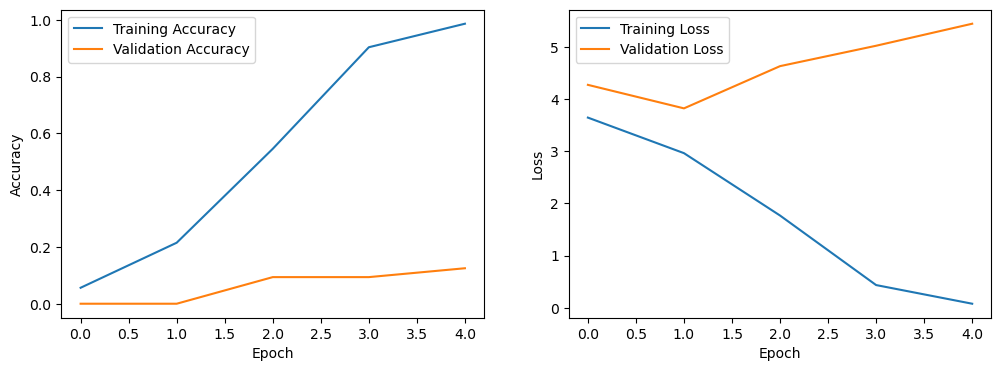

In [53]:
#plotting function
# we change our plotting function a bit as the previous code taken from lectures for plotting was yielding errors here



def plot_history(history):
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['sparse_categorical_accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_sparse_categorical_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.show()

plot_history(history)


In [54]:
#Results for evaluation
test_loss, test_accuracy = model.evaluate(test_ds)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

58/58 [==============================] - 4s 61ms/step - loss: 6.2461 - sparse_categorical_accuracy: 0.1116
Test loss: 6.246068954467773
Test accuracy: 0.11159498989582062


## Analysis of our results
##### From the graphs, we can see that training accuracy improves with every epoch whereas validation accuracy is somewhat stagnant throughout. From the sparse_categorical_accuracy ( training accuracy) we can see that it starts at a low value (0.0056) and increases with every epoch whereas our validation accuracy(val_sparse_categorical_accuracy), never really improves. This is a good indication of our model overfitting since it seems to be memorizing the training data and identifying general patterns.

##### When we compare the training accuracy results with that of the reported test accuracy, we can see a big discrepancy between the two figures (0.9867 and 0.1116 respectively). We also see a difference between training loss and test loss which further hints towards overfitting. 


### 3.2 

We try to improve on the above results by using a more complex architecture of our choice. In our solution, we must design the architecture from scratch (we do not use a pre-trained model). Compare with the best model in our task 2.

In [56]:
# we will use batch normalization technique to speed up the training speed and performance of our model. It will help us normalize our input
# the question mentions not to use any pretrained model, which we will assume that it is referring to weights and architecture like mobilenetv2, ResNet, inception etc.

from tensorflow.keras import layers, models

def create_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)))
    model.add(layers.BatchNormalization())  
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.25))
    
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.25))
    
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.25))
    
    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))
    
    model.add(layers.Dense(len(CLASS_NAMES) + 1, activation='softmax'))
    return model

model = create_model()
model.summary()


Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 198, 198, 32)      896       
                                                                 
 batch_normalization_4 (Batc  (None, 198, 198, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 99, 99, 32)       0         
 g2D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 99, 99, 32)        0         
                                                                 
 conv2d_16 (Conv2D)          (None, 97, 97, 64)        18496     
                                                                 
 batch_normalization_5 (Batc  (None, 97, 97, 64)     

In [57]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['sparse_categorical_accuracy']
)

EPOCHS = 20
early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=3)

history = model.fit(train_ds, 
                    validation_data=val_ds, 
                    epochs=EPOCHS, 
                    steps_per_epoch=steps_per_epoch,
                    validation_steps=validation_steps,
                    callbacks=[early_stopping_callback])


Epoch 1/20
115/115 [==============================] - 74s 636ms/step - loss: 4.0143 - sparse_categorical_accuracy: 0.0861 - val_loss: 6.3445 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 2/20
115/115 [==============================] - 70s 606ms/step - loss: 3.2854 - sparse_categorical_accuracy: 0.1690 - val_loss: 7.0959 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 3/20
115/115 [==============================] - 74s 641ms/step - loss: 2.7610 - sparse_categorical_accuracy: 0.2660 - val_loss: 5.0941 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 4/20
115/115 [==============================] - 83s 720ms/step - loss: 2.2760 - sparse_categorical_accuracy: 0.3696 - val_loss: 3.9472 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 5/20
115/115 [==============================] - 70s 611ms/step - loss: 1.5931 - sparse_categorical_accuracy: 0.5649 - val_loss: 4.1474 - val_sparse_categorical_accuracy: 0.0312
Epoch 6/20
115/115 [==============================] - 67s 583ms/step 

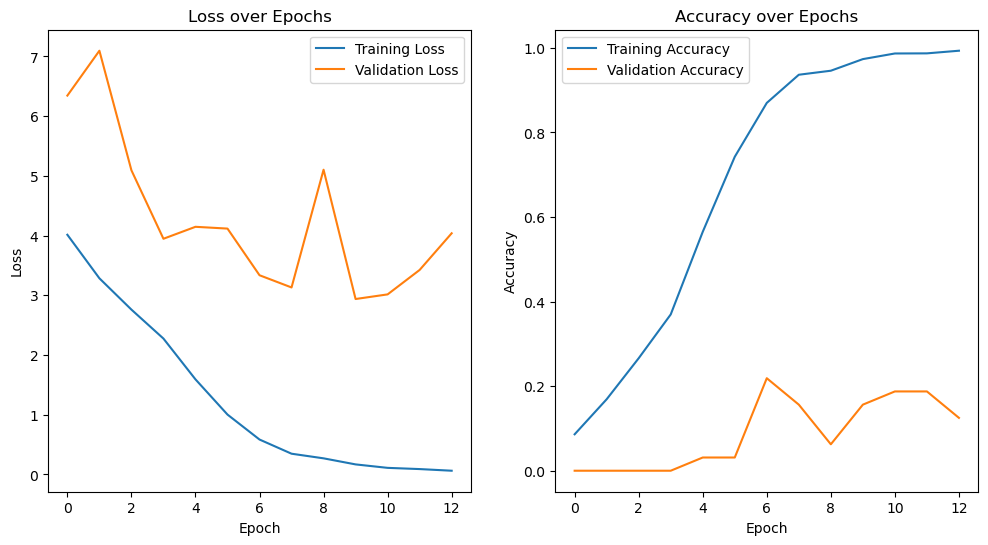

In [64]:
# although we can use the plotting function defined previously, the plots were a bit abnormal so we have defined our function again here. 

def plot_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    # Plot loss
    ax1.plot(history.history['loss'], label='Training Loss')
    ax1.plot(history.history['val_loss'], label='Validation Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend()
    ax1.set_title('Loss over Epochs')

    # Plot accuracy
    ax2.plot(history.history['sparse_categorical_accuracy'], label='Training Accuracy')
    ax2.plot(history.history['val_sparse_categorical_accuracy'], label='Validation Accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.legend()
    ax2.set_title('Accuracy over Epochs')

    plt.show()

plot_history(history)



In [66]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_ds)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")


58/58 [==============================] - 5s 85ms/step - loss: 3.6966 - sparse_categorical_accuracy: 0.1796
Test loss: 3.696610689163208
Test accuracy: 0.1796407252550125


### Commenting and comparing from the best model in task 2

##### It seems from the results that are model is overfitting, which is indicated by a difference in training and validation accuracy. The training accuracy (sparse_categorical_accuracy) reaches 0.9932, whereas the validation accuracy (val_sparse_categorical_accuracy) is much lower in the last epoch at 0.1250, which indicates that the model is learning the training data quite well but is performing poorly when it comes to test or unseen validation data. We can also corroborate this big difference from our graph, where there seems to be a diverging gap between training loss and validation loss. Training accuracy also seems to be improving over time from the graph, where as the validation accuracy barely improves, and the widening gap indicates overfitting. 
##### The Test accuracy also seems to be low at 0.1796, furthering hinting towards overfitting and impying that our model is not performing too good on the unseen data

##### The test accuracy in task 2's best model is significantly lower at 0.02721 compared to our new complex model's test accuracy standing at 0.1796. Our task 3 model (complex) also achieves a higher validation accuracy of 0.125, compared with 0.0272 of the previous "best model". The test loss is close to equal with a very minor difference and we can conclude that the complex model of task 3.2 performs significantly well. 

### 3.3 

Task: Using MobileNet, pre-trained on imagenet . We need to add the correct classification layer, and train it with our data. During training, we need to make sure that we freeze the pre-trained weights. I also need to pick a reasonable schedule for the learning rate. 

In [68]:
# for this question, ideas were taken from the code publically available on github 
# link : https://github.com/EhabR98/Transfer-Learning-with-MobileNetV2

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

# we will assume that "freezing the pre-trained weights" imply that we should NOT set weights='imagenet' and that weights should NOT update weights during training

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(200, 200, 3))


for layer in base_model.layers:
    layer.trainable = False   # do not update weights AKA freeze 


# adding our own layers (custom)
x = base_model.output
x = GlobalAveragePooling2D()(x)  # for dimensionality reduction and reducing the risk of overfitting
x = Dense(256, activation='relu')(x)
predictions = Dense(len(CLASS_NAMES) + 1, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)


# the learning rate defined
# https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/schedules/LearningRateSchedule
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-4,
    decay_steps=1000,
    decay_rate=0.9)

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])




In [69]:
EPOCHS = 20
early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=3)

history = model.fit(train_ds, 
                    validation_data=val_ds, 
                    epochs=EPOCHS, 
                    steps_per_epoch=steps_per_epoch,
                    validation_steps=validation_steps,
                    callbacks=[early_stopping_callback])


Epoch 1/20
115/115 [==============================] - 34s 269ms/step - loss: 2.6781 - sparse_categorical_accuracy: 0.3799 - val_loss: 2.9949 - val_sparse_categorical_accuracy: 0.0625
Epoch 2/20
115/115 [==============================] - 30s 259ms/step - loss: 1.0985 - sparse_categorical_accuracy: 0.7644 - val_loss: 2.4653 - val_sparse_categorical_accuracy: 0.0625
Epoch 3/20
115/115 [==============================] - 25s 218ms/step - loss: 0.6411 - sparse_categorical_accuracy: 0.8432 - val_loss: 1.8740 - val_sparse_categorical_accuracy: 0.2188
Epoch 4/20
115/115 [==============================] - 27s 238ms/step - loss: 0.4723 - sparse_categorical_accuracy: 0.8832 - val_loss: 1.5218 - val_sparse_categorical_accuracy: 0.5625
Epoch 5/20
115/115 [==============================] - 23s 204ms/step - loss: 0.3760 - sparse_categorical_accuracy: 0.9065 - val_loss: 1.3052 - val_sparse_categorical_accuracy: 0.5625
Epoch 6/20
115/115 [==============================] - 25s 214ms/step - loss: 0.3193 -

58/58 [==============================] - 13s 218ms/step - loss: 0.4359 - sparse_categorical_accuracy: 0.8514
Test loss: 0.43587955832481384
Test accuracy: 0.851388156414032


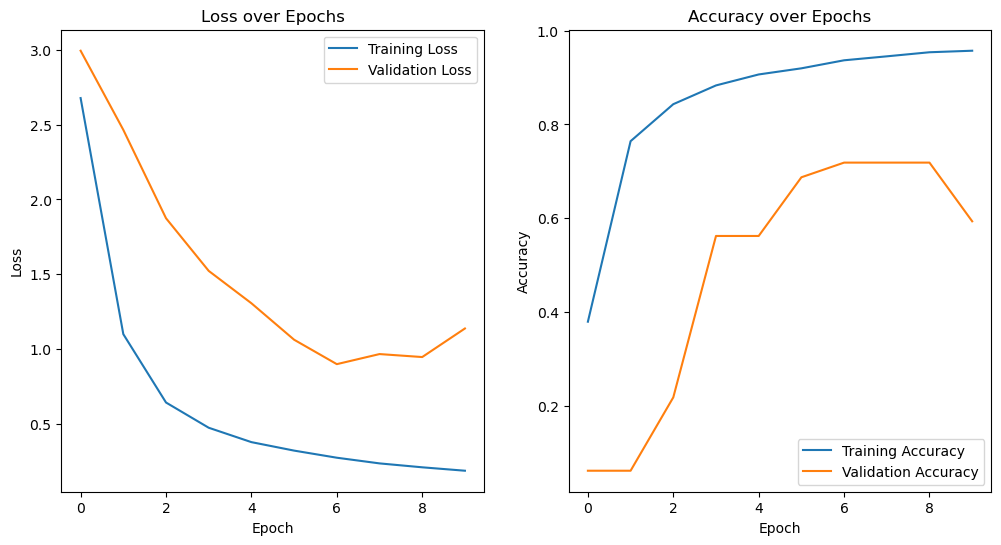

In [71]:
test_loss, test_accuracy = model.evaluate(test_ds)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")


plot_history(history)

### Evaluation and comparison with other models. 
#### We can see that mobilenetv2 model has significantly better performance compared to task 2's best model and our complex model in task 3. It has the highest test accuracy      (0.851) and the lowest test loss (0.435). This might be that the pretrained model already has a good understanding of general features in image recognition. We can see that the training of more than a million images on the ImageNet dataset has rendered it more capable than our models in extracting features and classifying images. 
#### The graphs also indicate that training and validation loss decreases over epochs and the accuracy increases. There is no widening or diverging gap that might indicate overfitting. Overall the model performs significantly better than all other models up till now.

### 3.4 

Add a data augmentation stage to the model implemented in 3.3 and compare results vs. 3.3. 

In [74]:
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation, RandomZoom

# Define the data augmentation layers
data_augmentation = tf.keras.Sequential([
    RandomFlip("horizontal"),
    RandomRotation(0.1),
    RandomZoom(0.2)
])

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(200, 200, 3))

for layer in base_model.layers:
    layer.trainable = False



In [75]:
# Incorporate the data augmentation layers into the model
inputs = tf.keras.Input(shape=(200, 200, 3))
x = data_augmentation(inputs)
x = base_model(x, training=False)
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(len(CLASS_NAMES) + 1, activation='softmax')(x)

model_with_augmentation = Model(inputs=inputs, outputs=predictions)

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-4,
    decay_steps=1000,
    decay_rate=0.9)


In [76]:
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
model_with_augmentation.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

EPOCHS = 20
early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=3)

history_with_augmentation = model_with_augmentation.fit(train_ds, 
                    validation_data=val_ds, 
                    epochs=EPOCHS, 
                    steps_per_epoch=steps_per_epoch,
                    validation_steps=validation_steps,
                    callbacks=[early_stopping_callback])

Epoch 1/20
115/115 [==============================] - 47s 363ms/step - loss: 2.9839 - sparse_categorical_accuracy: 0.2701 - val_loss: 3.2234 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 2/20
115/115 [==============================] - 39s 338ms/step - loss: 1.5681 - sparse_categorical_accuracy: 0.6367 - val_loss: 2.7240 - val_sparse_categorical_accuracy: 0.0625
Epoch 3/20
115/115 [==============================] - 34s 296ms/step - loss: 1.0006 - sparse_categorical_accuracy: 0.7334 - val_loss: 2.2221 - val_sparse_categorical_accuracy: 0.3125
Epoch 4/20
115/115 [==============================] - 34s 295ms/step - loss: 0.7998 - sparse_categorical_accuracy: 0.7832 - val_loss: 2.0885 - val_sparse_categorical_accuracy: 0.3438
Epoch 5/20
115/115 [==============================] - 35s 303ms/step - loss: 0.6929 - sparse_categorical_accuracy: 0.8019 - val_loss: 1.6807 - val_sparse_categorical_accuracy: 0.5000
Epoch 6/20
115/115 [==============================] - 35s 305ms/step - loss: 0.60

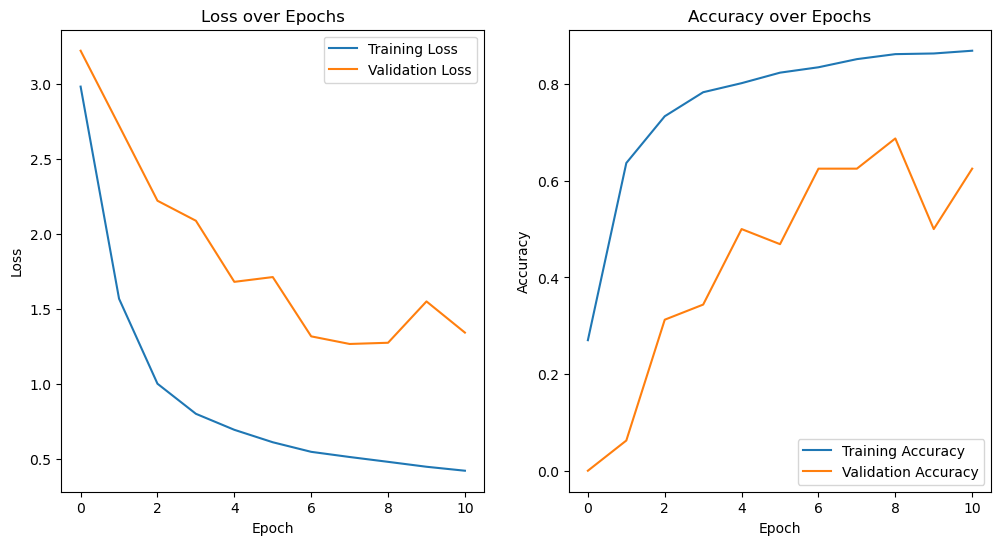

In [77]:
plot_history(history_with_augmentation)

In [78]:
test_loss_with_augmentation, test_accuracy_with_augmentation = model_with_augmentation.evaluate(test_ds)
print(f"Test loss (with data augmentation): {test_loss_with_augmentation}")
print(f"Test accuracy (with data augmentation): {test_accuracy_with_augmentation}")

58/58 [==============================] - 10s 168ms/step - loss: 0.4897 - sparse_categorical_accuracy: 0.8503
Test loss (with data augmentation): 0.4897204339504242
Test accuracy (with data augmentation): 0.8502994179725647


#### The Randomflip("horizontal") helps our model generalize against different orientation a cat or dog picture might be, for example. The RandomRotation(0.1), helps the model learn through slight or small rotations which actually is the result in most cases when we take pictures in real life circumstances. RandomZoom(0.2) helps the model to recognize an object feature of the animals despite a small zoom. The choice of 0.2 is justified as to reflect real life circumstances and not zoom to much as to distort the image. All these make our model invariant to their respective transformations. 

#### Comparing the results with 3.3, the augmentation model performs slightly poorly when it comes to test accuracy, but the difference is close to negligible (0.8502 vs 0.8513). It also has a higher test loss. In general it should perform better, as it improves the ability of the model to generalize against unseen data. However, in our case, this was not the result and it might be due to the choice of tranformation, the parameters or the dataset size. 